# Pima Indians Diabetes Dataset - SEN4018 Project

## Importing Libraries and Utilities:


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve

## Dataset Description:

The Pima Indians Diabetes Database is provided by The National Institute of Diabetes and Digestive and Kidney Diseases. This dataset is a subset of the larger dataset. In this dataset, all of the patients, are Pima Indian women who are at least 21 years old. The dataset contains 8 medical predictor factors:
<ol>
  <li>Number of times pregnant</li>
  <li>Plasma glucose concentration a 2 hours in an oral glucose tolerance test</li>
  <li>Diastolic blood pressure (mm Hg)</li>
  <li>Triceps skin fold thickness (mm)</li>
  <li>2-Hour serum insulin (mu U/ml)</li>
  <li>Body mass index (weight in kg/(height in m)^2)</li>
  <li>Diabetes pedigree function</li>
  <li>Age (years)</li>
</ol> 
And there is also the dependent variable, the "Outcome" which is either equal to 1 or 0.

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Data preprocessing:


minimum value of the following variables can not be zero:
<ol>
<li>Glucose</li>
<li>BloodPressure</li>
<li>SkinThickness</li>
<li>Insulin</li>
<li>BMI</li>
</ol>
Therefore we're replacing zeros with NAN for these variables, until we find more suitable values to replace them with.


In [5]:
df_copy= df.copy(deep = True)

df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[
    ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


## Data Visualization:

### Histograms:

Checking data distribution to understand what to fill the NAN values with

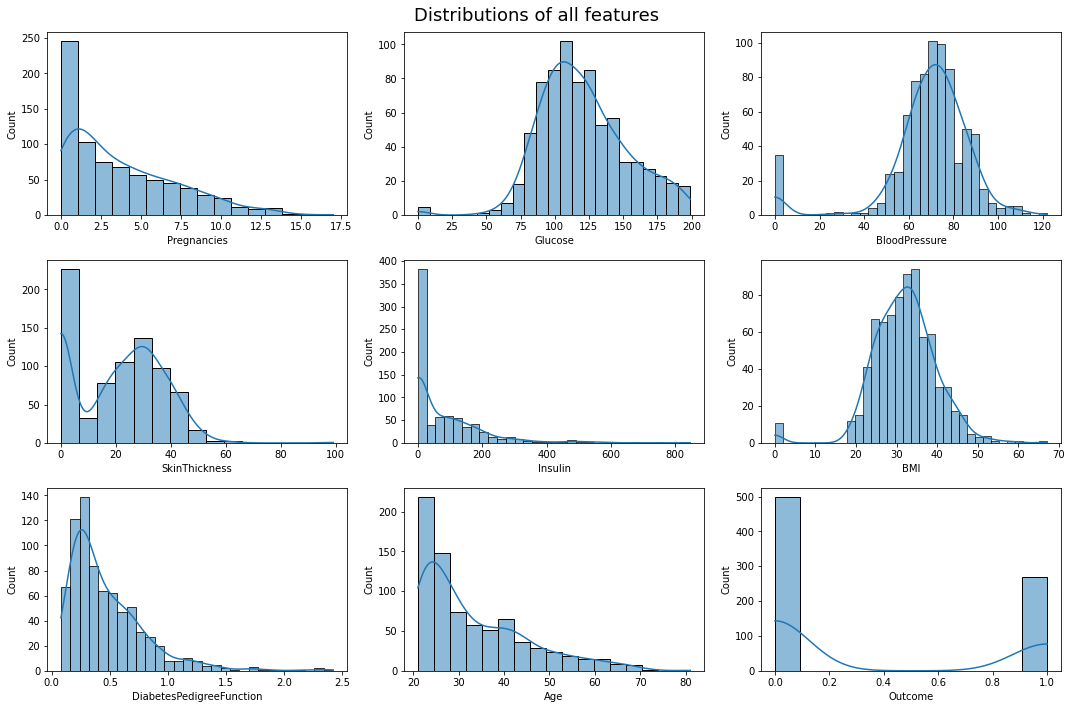

In [6]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,10))
for column, subplot in zip(df, ax.flatten()):
    sns.histplot(x = df[column], kde = True, ax = subplot)

fig.suptitle('Distributions of all features', fontsize = 18)
fig.tight_layout()
plt.show()

### Data imputation:

Now we replace the NAN values with more suitable values according to observing the 

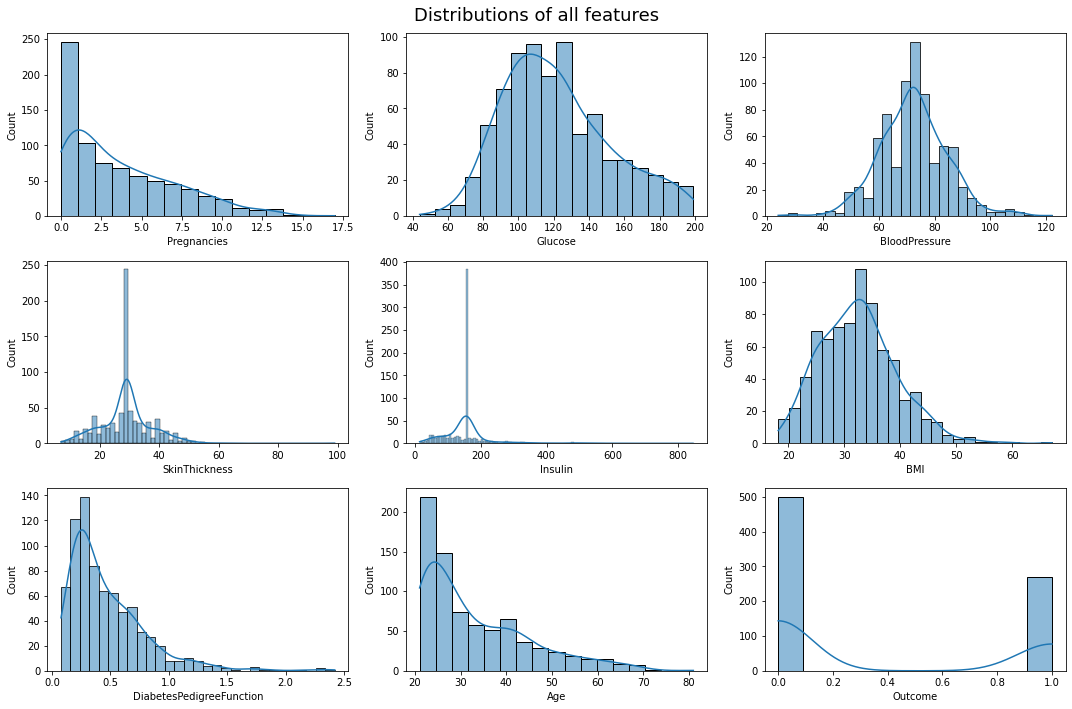

In [7]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].mean(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,10))
for column, subplot in zip(df_copy, ax.flatten()):
    sns.histplot(x = df_copy[column], kde = True, ax = subplot)

fig.suptitle('Distributions of all features', fontsize = 18)
fig.tight_layout()
plt.show()

### Box plots:

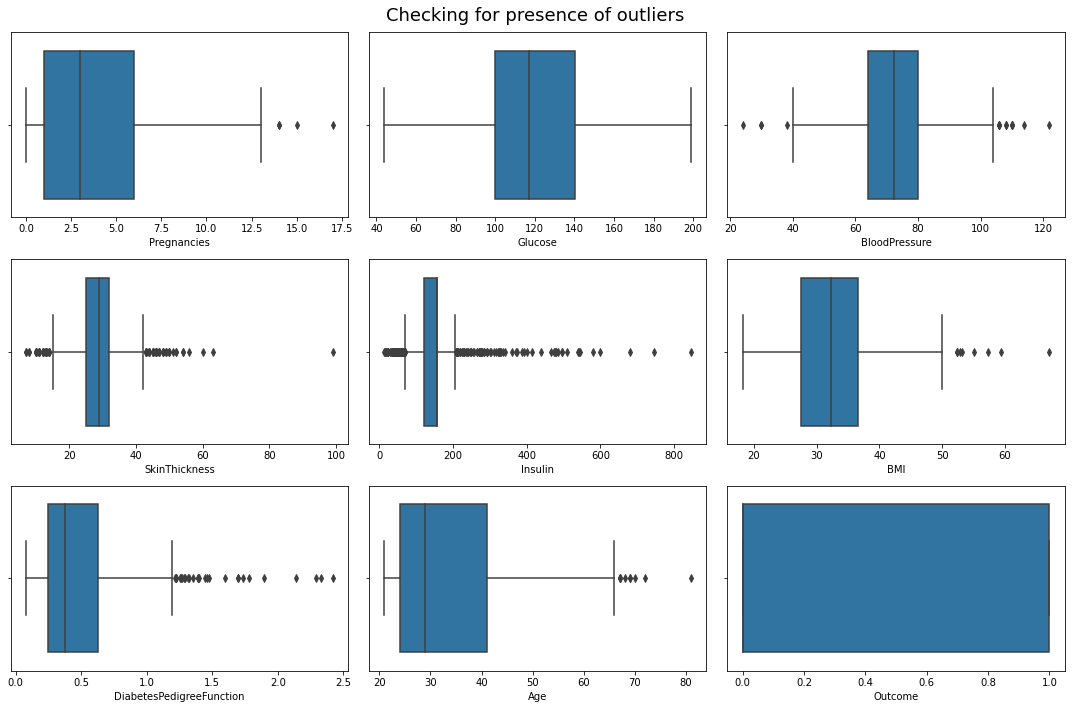

In [8]:
#Visualising the outliers in all the features:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,10))
for column, subplot in zip(df_copy, ax.flatten()):
    sns.boxplot(x = df_copy[column], ax = subplot)

fig.suptitle('Checking for presence of outliers', fontsize = 18)
fig.tight_layout()
plt.show()

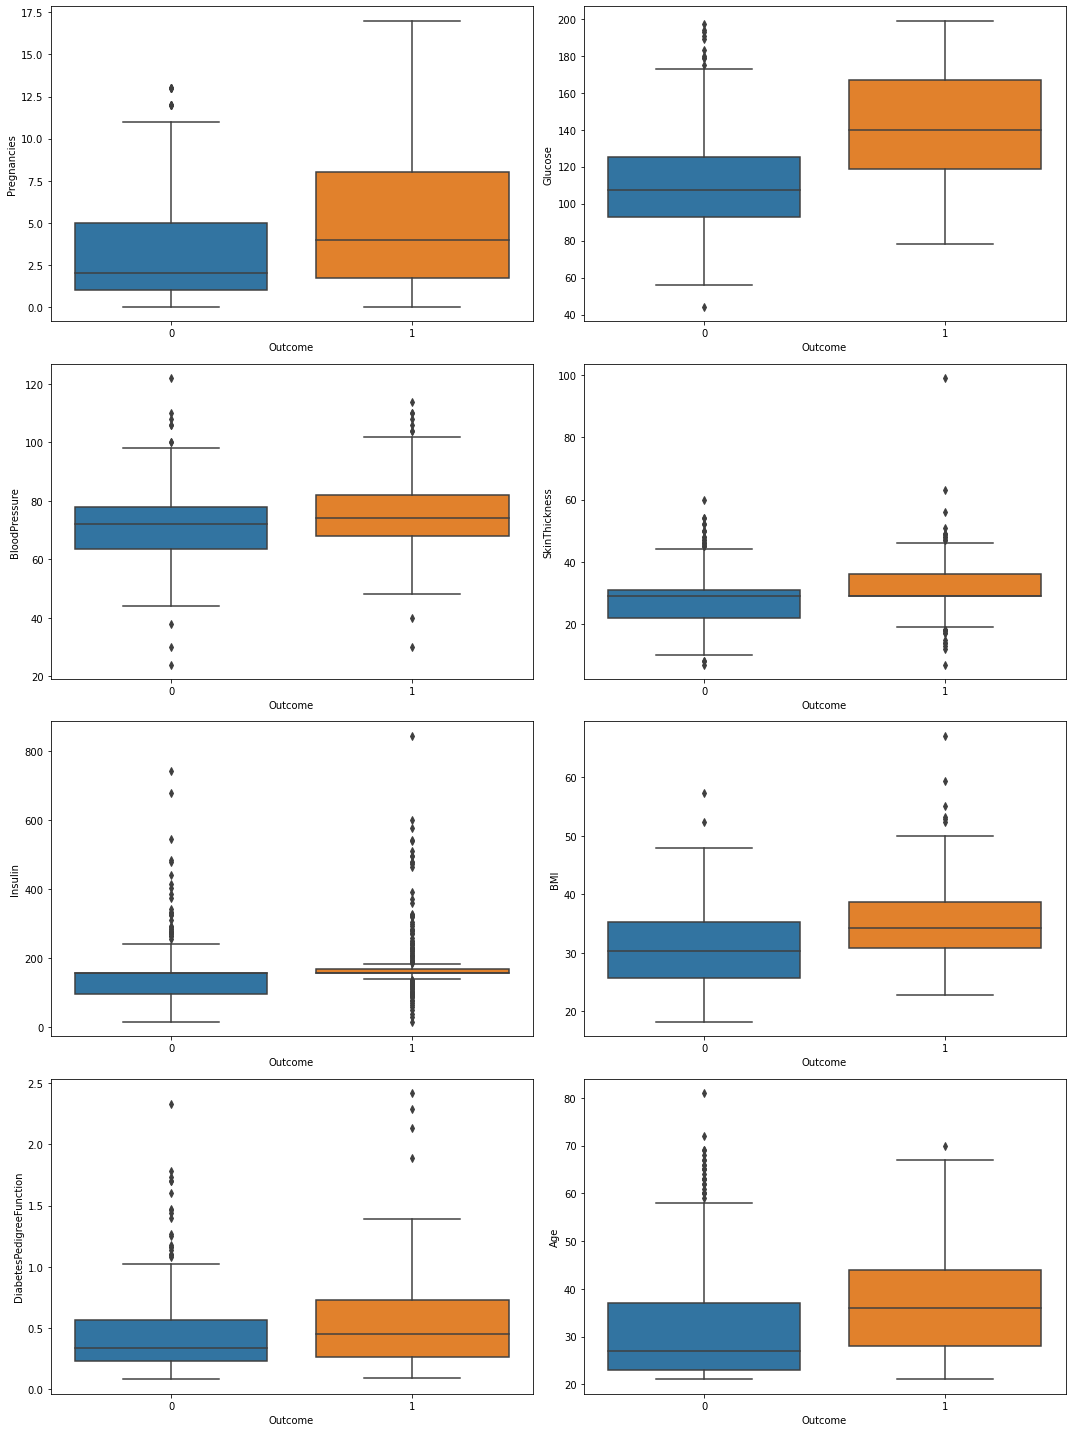

In [9]:
# the outliers actually help improve the prediction accuracy of the logistic regression model in this particular case and therefore we do not remove them.

#Plotting the predictor features against the target variable to check for correlations:
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (15,20))
for column, subplot in zip(df_copy, ax.flatten()):
    if column == 'Outcome':
        continue
    sns.boxplot(x = df_copy.Outcome, y = df_copy[column], ax = subplot)
    
fig.tight_layout()
plt.show()

### Heatmap:

Plotting a heatmap correlation matrix

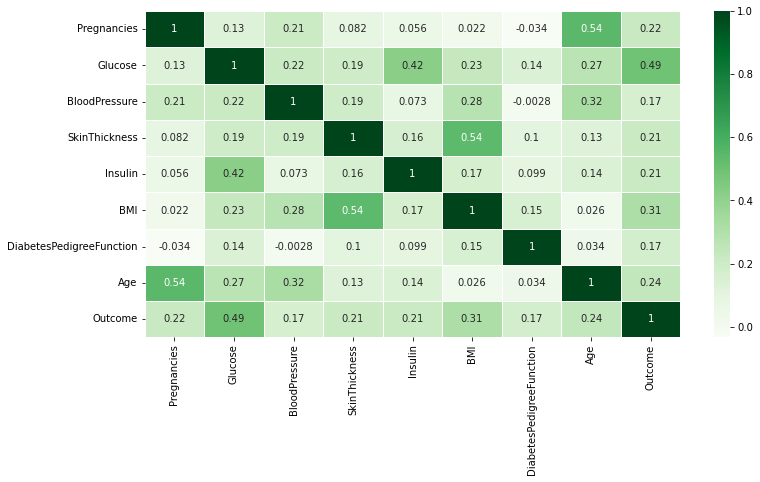

In [10]:
corr = df_copy.corr()
fig, ax = plt.subplots(figsize = (12,6))
sns.heatmap(corr, annot = True, cmap = 'Greens', linewidths = 0.7, ax = ax)
plt.show()

## Dataset Splitting:

In [11]:
#Splitting the dataset into dependent and independent features:
y = df_copy.Outcome
x = df_copy.drop(['Outcome'], axis = 1)

#Scaling the independent features:
scaler = StandardScaler()
scaler.fit(x)
X = scaler.fit_transform(x)

#Splitting the dataset into training and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#Fitting the data on the logistic regression model and making predictions:
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)
Logit_Prediction = Logit_Model.predict(X_test)

#Defining a function for plotting confusion matrix:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted: 0','Predicted: 1'], index = ['Actual: 0','Actual: 1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, linewidths = 0.1, annot_kws = {'size':20})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.title("Confusion matrix for " + model_name, fontsize = 15)
    plt.show()

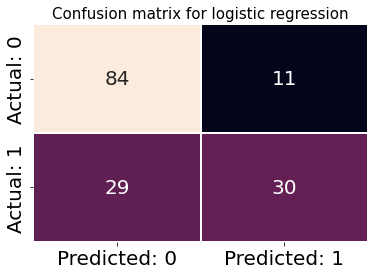

In [12]:
#Plotting confusion matrix:
plot_confusion_matrix(y_test, Logit_Prediction, "logistic regression")

In [13]:
accuracy_score(y_test,Logit_Prediction)

0.7402597402597403

In [14]:
print(classification_report(y_test,Logit_Prediction))

              precision    recall  f1-score   support

           0       0.74      0.88      0.81        95
           1       0.73      0.51      0.60        59

    accuracy                           0.74       154
   macro avg       0.74      0.70      0.70       154
weighted avg       0.74      0.74      0.73       154



## Modeling:

### K-Fold Cross Validation

In [15]:
accuracy= cross_val_score(estimator=Logit_Model,
                            X=X_train,y=y_train,
                            cv=10)
print("Average Accuracy: {:.2f} %".format(accuracy.mean()*100))
print("Standard Deviation of Accuracy: {:.2f} %".format(accuracy.std()*100))

Average Accuracy: 77.03 %
Standard Deviation of Accuracy: 3.89 %


In [16]:
Logit_Model.predict(X_test)[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
results = pd.DataFrame(Logit_Model.predict_proba(X_test)[:10],
             columns=["Possibility of 0","Possibility of 1"])

results["Class"]=[1 if i>0.5 else 0 for i in results["Possibility of 1"]]

results

,Possibility of 0,Possibility of 1,Class
0,0.447662,0.552338,1
1,0.753327,0.246673,0
2,0.520646,0.479354,0
3,0.916930,0.083070,0
4,0.896715,0.103285,0
5,0.958550,0.041450,0
6,0.921040,0.078960,0
7,0.683426,0.316574,0
8,0.947893,0.052107,0
9,0.677712,0.322288,0


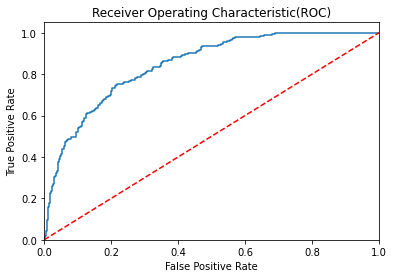

In [18]:
logistic_regression = LogisticRegression(random_state=0,solver="liblinear").fit(X,y)
logistic_regression_roc = roc_auc_score(y,logistic_regression.predict(X))

fp,tp,trshld = roc_curve(y,logistic_regression.predict_proba(X)[:,1])
plt.figure()
plt.plot(fp,tp,label="Area Under Curve(AUC)" %logistic_regression_roc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic(ROC)")
plt.show()